#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('oyo_visuals.csv')
df.head()

,year,month,oyo_id,hub,city,cluster,SRNs,GMV,OCC,OTA,...,Direct.1,Rest.1,Revpar,Cancellations,No_Shows,GTR,NTR,MG_Loss,Review score,display_category
0,2020,1,ID_ABN001,North Sulawesi,Ambon,Rijali,1643,22794009.02,0.0919,0.0572,...,0,0,13874,0.3494,0.0892,0.2496,0.1305,0,6.4,OYO Hotels
1,2020,1,ID_ABN001,North Sulawesi,Ambon,Rijali,1643,22794009.02,0.0919,0.0572,...,0,0,13874,0.3494,0.0892,0.2496,0.1305,0,9.7,OYO Hotels
2,2020,1,ID_ABN001,North Sulawesi,Ambon,Rijali,1643,22794009.02,0.0919,0.0572,...,0,0,13874,0.3494,0.0892,0.2496,0.1305,0,7.2,OYO Hotels
3,2020,1,ID_ABN003,North Sulawesi,Ambon,Teluk Ambon,620,37800941.82,0.2694,0.1339,...,0,0,60959,0.2233,0.0000,0.2636,0.1586,0,5.7,OYO Hotels
4,2020,1,ID_ABN003,North Sulawesi,Ambon,Teluk Ambon,620,37800941.82,0.2694,0.1339,...,0,0,60959,0.2233,0.0000,0.2636,0.1586,0,6.3,OYO Hotels


In [3]:
df.shape
print(df['hub'].value_counts())

Jakarta            957
East Java 1        940
West Java 1        504
Yogyakarta         396
Bali Nusra         256
South Sumatra      250
BC                 228
South Sulawesi     200
Central Sumatra    199
East Java 2        181
North Sumatra      169
Kalimantan         167
Bogor              133
East Java 3        128
West Java 2        115
North Sulawesi     111
Central Java       108
0                    4
Name: hub, dtype: int64


- Di dalam fitur 'hub', city', cluster' pada dataset yang digunakan terdapat data yang berisi angka 0, yaitu properti yang baru bergabung dan belum memiliki data untuk bulan ini
- Maka 0 tersebut akan diubah namanya menjadi 'others'

In [4]:
hub = {'0' : 'others'}
city = {'0' : 'others'}
cluster = {'0' : 'others'}
df['hub'] = df['hub'].replace(hub)
df['city'] = df['city'].replace(city)
df['cluster'] = df['cluster'].replace(cluster)

# df['hub'].value_counts()

In [5]:
df.columns

Index(['year', 'month', 'oyo_id', 'hub', 'city', 'cluster', 'SRNs', 'GMV',
       'OCC', 'OTA', 'TraveLoka', 'Booking.com', 'Agoda', 'Tiket.com',
       'Pegipegi', 'Expedia', 'App', 'MM', 'Walk_In', 'Web', 'Direct', 'Rest',
       'ARR', 'OTA.1', 'TraveLoka.1', 'Booking.com.1', 'Agoda.1',
       'Tiket.com.1', 'Pegipegi.1', 'Expedia.1', 'App.1', 'MM.1', 'Walk_In.1',
       'Web.1', 'Direct.1', 'Rest.1', 'Revpar', 'Cancellations', 'No_Shows',
       'GTR', 'NTR', 'MG_Loss', 'Review score', 'display_category'],
      dtype='object')

Hub atau region yang memiliki jumlah properti terbanyak

In [6]:
top_host = df['hub'].value_counts()
top_host

Jakarta            957
East Java 1        940
West Java 1        504
Yogyakarta         396
Bali Nusra         256
South Sumatra      250
BC                 228
South Sulawesi     200
Central Sumatra    199
East Java 2        181
North Sumatra      169
Kalimantan         167
Bogor              133
East Java 3        128
West Java 2        115
North Sulawesi     111
Central Java       108
others               4
Name: hub, dtype: int64

Region Jakarta memiliki jumlah properti terbanyak. Terdapat perbedaan signifikan selain East Java 1

Text(0.5, 0, 'Hub')

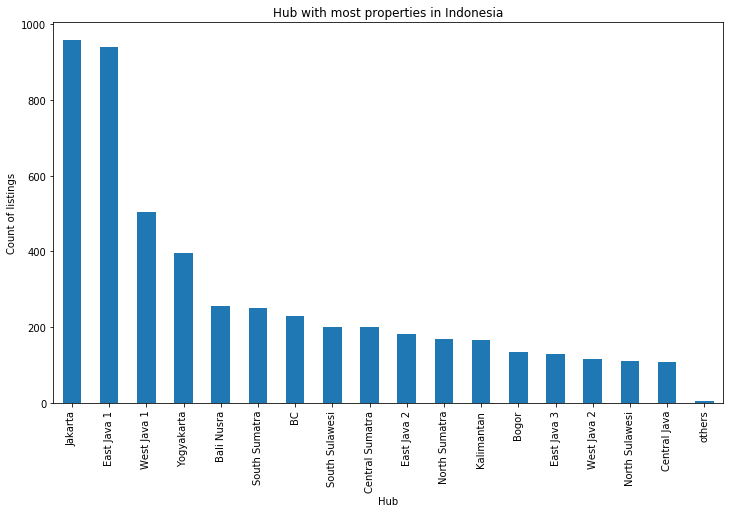

In [7]:
plt.figure(figsize=(12,7))
vis_1=top_host.plot(kind='bar')
vis_1.set_title('Hub with most properties in Indonesia')
vis_1.set_ylabel('Count of listings')
vis_1.set_xlabel('Hub')

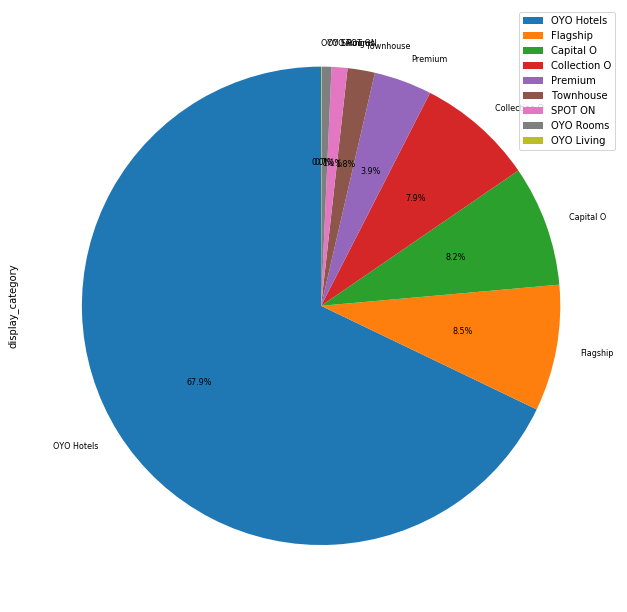

In [8]:
pie = df['display_category'].value_counts()

plt.figure(figsize=(15,11
                   ))

# plot chart
# ax1 = plt.subplot(121, aspect='equal')
pie.plot(kind='pie', y = 'display_category', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend =True, fontsize=8)

<hr>

Jumlah ketersediaan kamar terbanyak ada di Region Jakarta, sesuai dengan jumlah propertinya

In [9]:
srn_rate = df[['hub','SRNs']].groupby(['hub']).sum()
srn_rate

,SRNs
hub,
BC,483488
Bali Nusra,218980
Bogor,125190
Central Java,105100
Central Sumatra,319641
East Java 1,1441561
East Java 2,137075
East Java 3,103412
Jakarta,1751180


Text(0.5, 0, 'Hub')

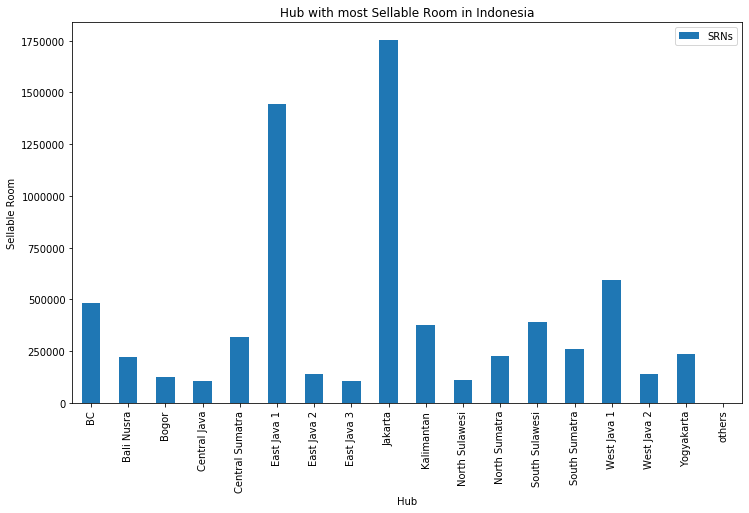

In [10]:
vis_3=srn_rate.plot(kind='bar',figsize=(12,7))
vis_3.set_title('Hub with most Sellable Room in Indonesia')
vis_3.set_ylabel('Sellable Room')
vis_3.set_xlabel('Hub')

Occupancy tertinggi berada di Region West Java 1, dan paling sedikit di East Java 2

Text(0.5, 0, 'Hub')

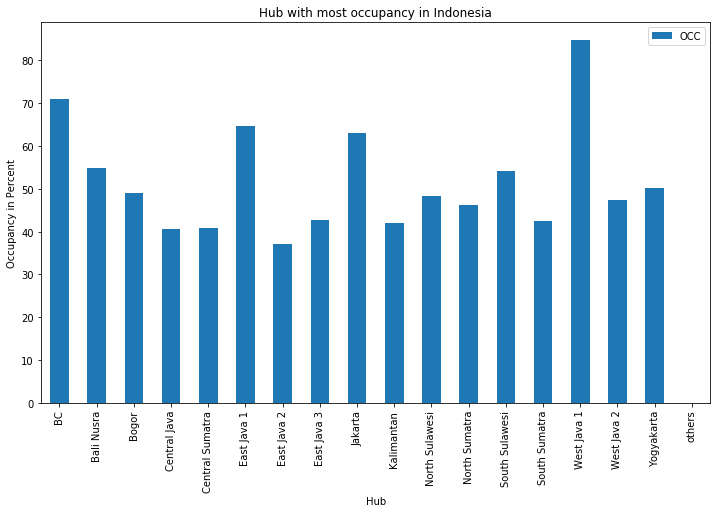

In [11]:
occ_rate = (df[['hub','OCC']].groupby(['hub']).mean()) * 100
occ_rate
vis_2=occ_rate.plot(kind='bar',figsize=(12,7))
vis_2.set_title('Hub with most occupancy in Indonesia')
vis_2.set_ylabel('Occupancy in Percent')
vis_2.set_xlabel('Hub')

In [12]:
walkin_rate = df[['hub','Walk_In']].groupby(['hub']).sum()
# walkin_rate

Text(0.5, 0, 'Hub')

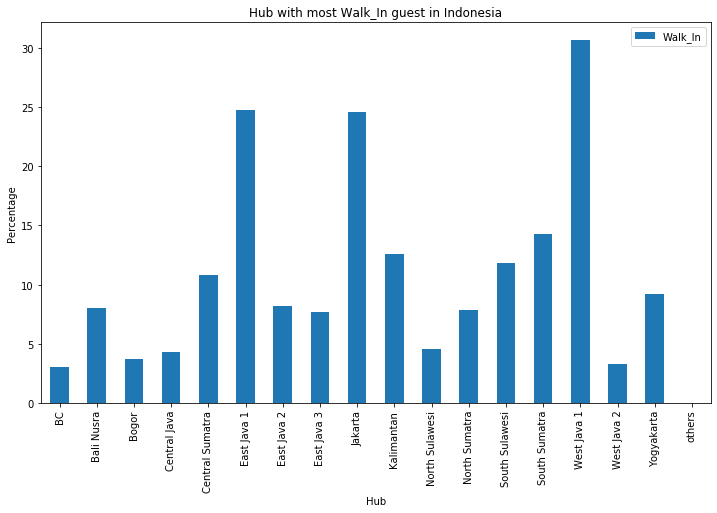

In [13]:
vis_4=walkin_rate.plot(kind='bar',figsize=(12,7))
vis_4.set_title('Hub with most Walk_In guest in Indonesia')
vis_4.set_ylabel('Percentage')
vis_4.set_xlabel('Hub')

In [14]:
OTA_hub = df[['hub','OTA']].groupby(['hub']).mean() * 100



Text(0.5, 0, 'OTA')

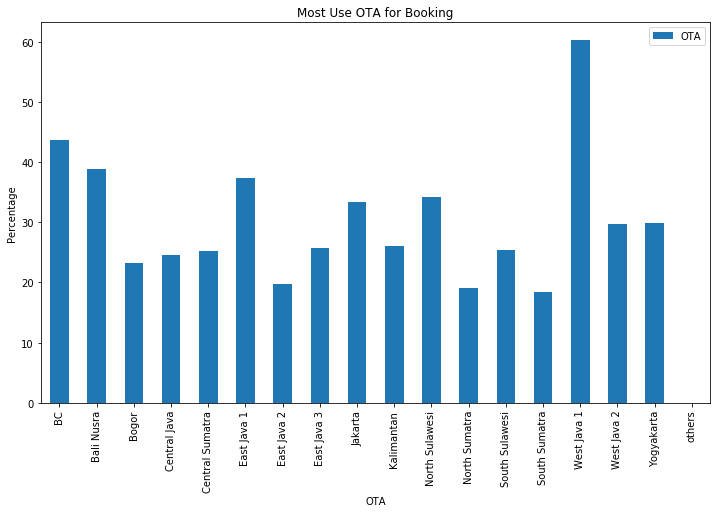

In [15]:
visOTA = OTA_hub.plot(kind='bar',figsize=(12,7))
visOTA.set_title('Most Use OTA for Booking')
visOTA.set_ylabel('Percentage')
visOTA.set_xlabel('OTA')

Distribusi booking kamar menggunakan online travel agent terbanyak pada setiap region

In [16]:
OTA_perhub =  df[['TraveLoka', 'Booking.com', 'Agoda', 'Tiket.com',
       'Pegipegi', 'Expedia','hub']].groupby(['hub']).mean() * 100
OTA_perhub['TraveLoka']

# plt.figure(figsize=(12,8))

hub
BC                 22.442807
Bali Nusra         12.955898
Bogor              13.107744
Central Java       11.149815
Central Sumatra    11.175980
East Java 1        18.761309
East Java 2         8.070331
East Java 3        14.200937
Jakarta            14.812811
Kalimantan         16.875749
North Sulawesi     23.897928
North Sumatra       7.913550
South Sulawesi     14.440100
South Sumatra      11.180360
West Java 1        19.826944
West Java 2        12.801304
Yogyakarta         14.018030
others              0.000000
Name: TraveLoka, dtype: float64

Text(0.5, 0, 'OTA')

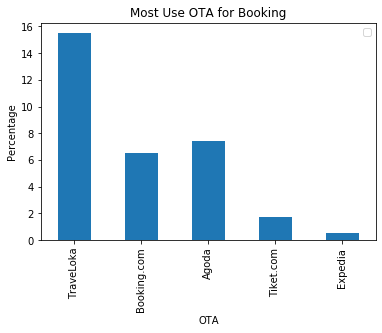

In [17]:
OTA_type = pd.DataFrame(df[['TraveLoka', 'Booking.com', 'Agoda', 'Tiket.com','Expedia']].mean() * 100)
vis5 = OTA_type.plot(kind='bar')
vis5.legend('')
vis5.set_title('Most Use OTA for Booking')
vis5.set_ylabel('Percentage')
vis5.set_xlabel('OTA')

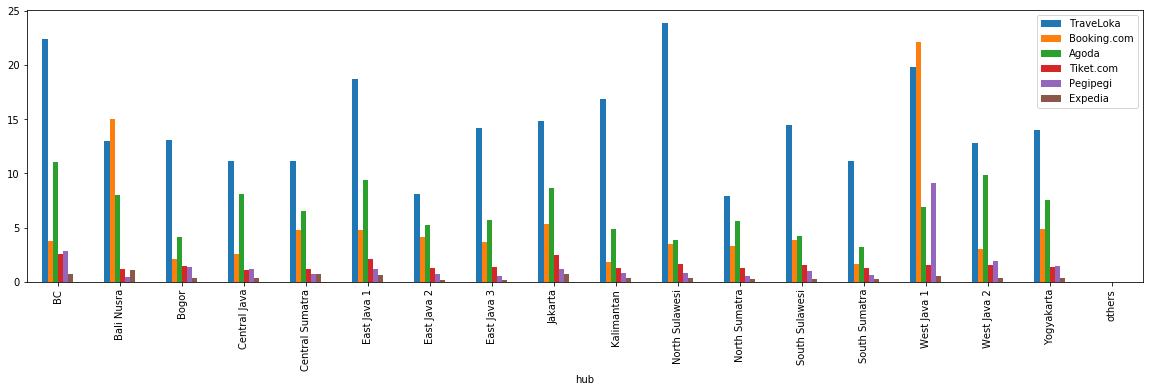

In [18]:
OTA_perhub[['TraveLoka', 'Booking.com', 'Agoda', 'Tiket.com',
       'Pegipegi', 'Expedia']].plot(kind='bar', stacked=False, figsize=(20,5))

Traveloka memiliki kontribusi paling tinggi terhadap pemesanan kamar Oyo melalui OTA, disusul oleh booking.com. 
OTA seperti Agoda, Tiket.com , Pegipegi dan Expedia memiliki kontribusi yang cukup merata di setiap region. 

Kontribusi TraveLoka terkecil berada di Region East Java 2 dan North Sumatra

In [19]:
# Drop 0 values in Traveloka to get minimun values
df['TraveLoka'] = df['TraveLoka'].replace(0, np.nan)
df['TraveLoka'] = df['TraveLoka'].dropna(how='all', axis=0)

Karena Traveloka memiliki kontribusi yang tinggi, maka akan dicari di kota mana penggunaan OTA Traveloka terkecil

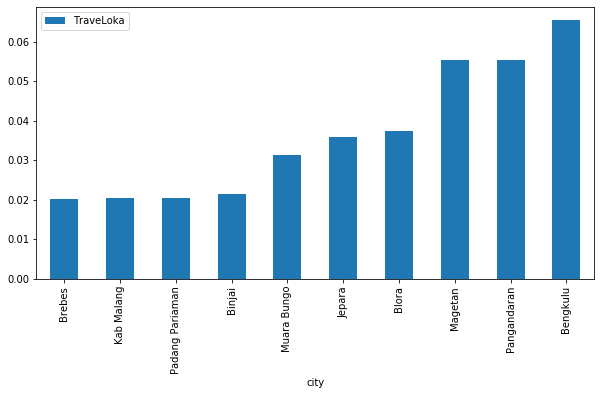

In [20]:
# OTA_city = df[['TraveLoka','city']].groupby(['city']).mean()
lowestT = pd.pivot_table(df, values='TraveLoka', index=['city'], aggfunc=np.mean).nsmallest(10, 'TraveLoka')
lowestT.plot(kind='bar', figsize=(10,5))

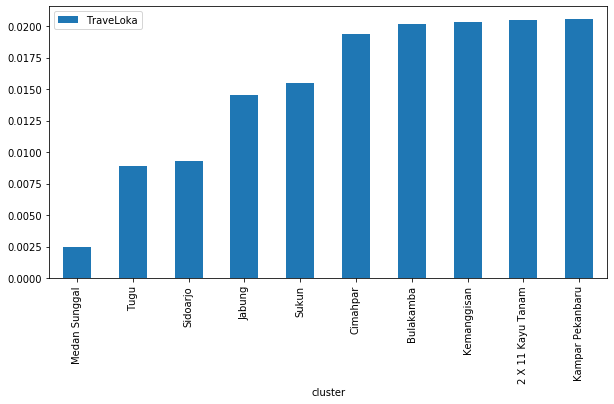

In [21]:
lowestT1 = pd.pivot_table(df, values='TraveLoka', index=['cluster'], aggfunc=np.mean).nsmallest(10, 'TraveLoka')
lowestT1.plot(kind='bar', figsize=(10,5))


In [22]:
# OTA_city['TraveLoka'].plot(kind='bar', stacked=False, figsize=(20,5))

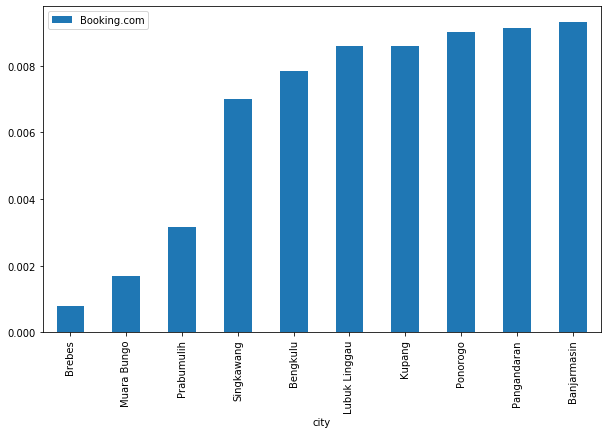

In [23]:
df['Booking.com'] = df['Booking.com'].replace(0, np.nan)
df['Booking.com'] = df['Booking.com'].dropna(how='all', axis=0)
lowestB = pd.pivot_table(df, values='Booking.com', index=['city'], aggfunc=np.mean).nsmallest(10, 'Booking.com')
lowestB.plot(kind='bar',figsize=(10,6))


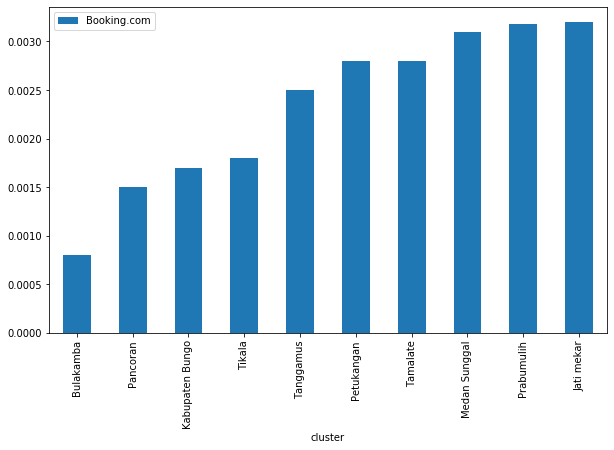

In [24]:
lowestBcity = pd.pivot_table(df, values='Booking.com', index=['cluster'], aggfunc=np.mean).nsmallest(10, 'Booking.com')
lowestBcity.plot(kind='bar',figsize=(10,6))

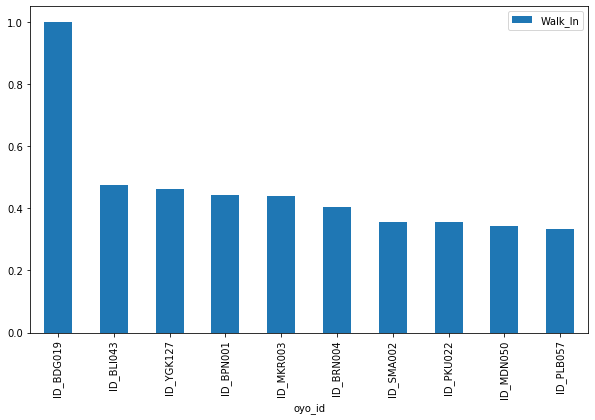

In [25]:
walkin = pd.pivot_table(df, values='Walk_In', index=['oyo_id'], aggfunc=np.mean).nlargest(10, 'Walk_In')
walkin.plot(kind='bar',figsize=(10,6))

In [26]:
lowNTR = pd.pivot_table(df, values='NTR', index=['oyo_id'], aggfunc=np.mean).nsmallest(20, 'NTR')
lowNTR

,NTR
oyo_id,
ID_MLG049,-inf
ID_BPN018,-3.5431
ID_MDN017,-3.0665
ID_JKT232,-2.0329
ID_BPN016,-1.8361
ID_SRG002,-1.6871
ID_SLO007,-1.5737
ID_MKR049,-1.4736
ID_SRB063,-1.4166


In [27]:
walkinhub = (df[['Walk_In','NTR','hub']].groupby(['hub']).mean()) * 100
walkinhub = round(walkinhub,2)
walkinhub

,Walk_In,NTR
hub,,
BC,1.33,14.39
Bali Nusra,3.14,10.47
Bogor,2.77,16.31
Central Java,3.95,-2.01
Central Sumatra,5.42,8.69
East Java 1,2.64,6.95
East Java 2,4.52,-inf
East Java 3,6.02,15.52
Jakarta,2.57,9.16


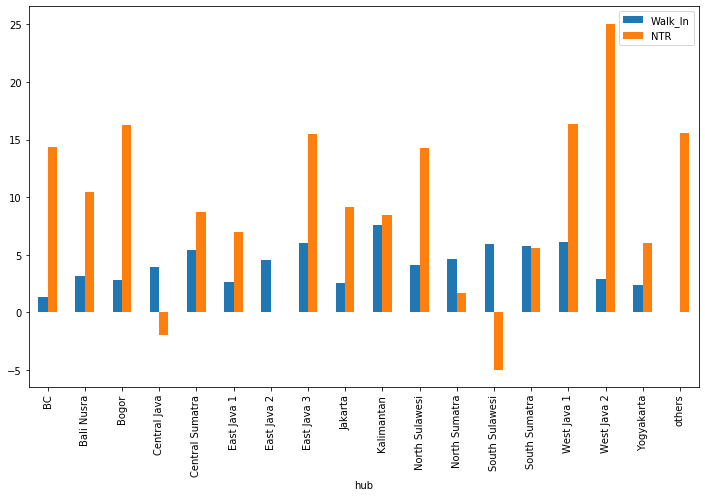

In [28]:
walkinhub.plot(kind='bar',figsize=(12,7))

In [29]:
walkinID = (df[['Walk_In','NTR','oyo_id']].groupby(['oyo_id']).mean().nlargest(20,'Walk_In')) * 100
walkinID

,Walk_In,NTR
oyo_id,,
ID_BDG019,100.00,117.97
ID_BLI043,47.40,4.61
ID_YGK127,46.18,23.96
ID_BPN001,44.13,8.92
ID_MKR003,43.90,7.19
ID_BRN004,40.53,33.79
ID_SMA002,35.60,6.15
ID_PKU022,35.44,32.66
ID_MDN050,34.18,8.27
